In [2]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from YAML
#model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='data.yaml', epochs=50, imgsz=640)
#34


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/10         0G      1.817      3.864      1.584         13        640: 100%|██████████| 8/8 [00:57<00:00,  7.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<0
                   all         40         76    0.00492      0.776      0.101     0.0418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/10         0G       1.47      2.486      1.261         13        640: 100%|██████████| 8/8 [00:43<00:00,  5.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<0
                   all         40         76    0.00633          1       0.62      0.311

      Epoch    GPU_mem   b

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO('runs/detect/train/weights/best.pt')  # load the trained model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.196  Python-3.8.5 torch-2.1.0+cpu CPU (11th Gen Intel Core(TM) i5-11300H 3.10GHz)
C:\Users\henri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning C:\Users\henri\JupyterNotebooks\AA\datasets\valid\labels.cache... 40 images, 0 backgrounds, 0 corrupt: 10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<0
                   all         40         76      0.997      0.974      0.993      0.714
Speed: 2.9ms preprocess, 155.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\val4


array([    0.71371])

In [2]:
results = model("valid/images/dog_face_cataract_6_jpg.rf.a2652e9411f77fb2ec10e66ff91d11b6.jpg")
boxes = results[0].boxes
for box in boxes:
    print(box.xyxy)


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\valid\images\dog_face_cataract_6_jpg.rf.a2652e9411f77fb2ec10e66ff91d11b6.jpg: 640x640 2 eyes, 144.0ms
Speed: 4.0ms preprocess, 144.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([[274.1938, 130.8441, 348.3881, 188.6037]])
tensor([[450.4929, 115.9670, 497.5165, 176.2367]])


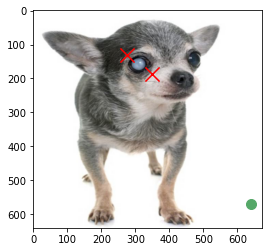

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread("valid/images/dog_face_cataract_6_jpg.rf.a2652e9411f77fb2ec10e66ff91d11b6.jpg")
pts = np.array([[274, 130], [348, 188]])

plt.imshow(image)
plt.plot(640, 570, "og", markersize=10)  # Plot a green circle at (640, 570)
plt.scatter(pts[:, 0], pts[:, 1], marker="x", color="red", s=200)  # Scatter red "x" markers
plt.show()

In [4]:
import cv2
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def recortar_e_salvar_olhos(pasta, pasta_destino):
      # Certifique-se de que a pasta de destino exista ou a crie
    if not os.path.exists(pasta_destino):
        os.makedirs(pasta_destino)

    # Iterate through every file in the directory
    for filename in os.listdir(pasta):
        # Check if the current item is a file (not a subdirectory)
        if os.path.isfile(os.path.join(pasta, filename)):
            # Example file path
            file_path = os.path.join(pasta, filename)

            # Carrega a imagem
            img = cv2.imread(file_path)

            # Extract the file name without extension
            file_name_without_extension = os.path.splitext(os.path.basename(file_path))[0]

            # Extract the last 4 characters of the file name (excluding the extension)
            tag = file_name_without_extension[-6:]

            # Eye detection using the model
            results = model(file_path)
            boxes = results[0].boxes
            rounded_numbers = []

            for box in boxes:
                # Convert the tensor to a list of float values
                box_coords = box.xyxy[0].tolist()

                # Extract rounded coordinates
                numbers = [math.floor(coord) for coord in box_coords]
                rounded_numbers.append((numbers[0], numbers[1], numbers[2], numbers[3]))

            # Itera pelas coordenadas das bounding boxes dos olhos
            for i, (xmin, ymin, xmax, ymax) in enumerate(rounded_numbers):
                # Recorte a região do olho da imagem
                olho_recortado = img[ymin:ymax, xmin:xmax]

                # Salva o olho recortado em uma pasta com um nome único
                nome_arquivo = f"olho_{tag}_{i}.png"
                caminho_salvar = os.path.join(pasta_destino, nome_arquivo)
                cv2.imwrite(caminho_salvar, olho_recortado)

In [5]:
pasta = "imagens"
coordenadas_olhos = [(274, 130, 349, 189), (450, 115, 498, 177)] 

pasta_destino = "recortar_olhos"

recortar_e_salvar_olhos(pasta, pasta_destino)


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_100_jpg.rf.d0b9061b3a3588dd93ba9d6b10f63ad5.jpg: 640x640 1 eye, 124.0ms
Speed: 4.0ms preprocess, 124.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_101_jpg.rf.1b8e61dd4544fc2b7fbcc78bbea0ad83.jpg: 640x640 2 eyes, 136.0ms
Speed: 4.1ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_102_jpg.rf.51d3c3577153b5c92cf583abe4140960.jpg: 640x640 1 eye, 124.1ms
Speed: 0.0ms preprocess, 124.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_103_jpg.rf.38a0b3bedde30b389603b5f4454cba03.jpg: 640x640 2 eyes, 128.0ms
Speed: 4.1ms preprocess, 128.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640,


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_2_jpg.rf.10f48925738888a40b0de38256bb100d.jpg: 640x640 2 eyes, 119.4ms
Speed: 0.0ms preprocess, 119.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_30_jpg.rf.40616009948092fcfaee9445b648f3e4.jpg: 640x640 2 eyes, 120.1ms
Speed: 4.1ms preprocess, 120.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_31_jpg.rf.82a10b59a3ab345b5a47a90bc76d2d8e.jpg: 640x640 2 eyes, 112.2ms
Speed: 4.0ms preprocess, 112.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_32_jpg.rf.48f18cb8ec1289e688ba132823bc6a6c.jpg: 640x640 2 eyes, 108.9ms
Speed: 4.0ms preprocess, 108.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 64


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_67_jpg.rf.aad396d922505d1a02105ad7bd01b5f6.jpg: 640x640 2 eyes, 128.1ms
Speed: 4.0ms preprocess, 128.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_68_jpg.rf.8d7263dc0aad8303a18d73cb3a7f00dc.jpg: 640x640 2 eyes, 120.1ms
Speed: 4.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_6_jpg.rf.a2652e9411f77fb2ec10e66ff91d11b6.jpg: 640x640 2 eyes, 124.4ms
Speed: 0.0ms preprocess, 124.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_cataract_70_jpg.rf.124103d95b3164cb1e68fb40fd99fd46.jpg: 640x640 2 eyes, 140.1ms
Speed: 4.0ms preprocess, 140.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 64


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_100_jpg.rf.6a0cc0e715e89f3194a1870e785e3b66.jpg: 640x640 2 eyes, 124.2ms
Speed: 4.0ms preprocess, 124.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_101_jpg.rf.8002efdc99f5942bffb6c1ab78ddb369.jpg: 640x640 2 eyes, 136.0ms
Speed: 0.0ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_102_jpg.rf.340e677195242e888275fe5482508199.jpg: 640x640 2 eyes, 140.1ms
Speed: 4.0ms preprocess, 140.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_103_jpg.rf.83887cd40b38f9a805396ea7a5c4dd92.jpg: 640x640 2 eyes, 120.1ms
Speed: 4.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_35_jpg.rf.6ed518360cf031848ac8b120373d5b5c.jpg: 640x640 2 eyes, 128.1ms
Speed: 4.0ms preprocess, 128.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_36_jpg.rf.35395ae5c63b837e615764aee5e59422.jpg: 640x640 2 eyes, 128.1ms
Speed: 4.0ms preprocess, 128.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_37_jpg.rf.c24df652067fea3f0edf96051cc14cb0.jpg: 640x640 2 eyes, 148.1ms
Speed: 0.0ms preprocess, 148.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_38_jpg.rf.96fe84f559f5366db15d9f4458f9e866.jpg: 640x640 2 eyes, 148.0ms
Speed: 4.0ms preprocess, 148.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

ima


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_67_jpg.rf.5ae914b3553c0e0b9c29c8a7325ae498.jpg: 640x640 2 eyes, 136.3ms
Speed: 4.0ms preprocess, 136.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_68_jpg.rf.73a1dc5603baf2d50bebdd1ef7a7db5c.jpg: 640x640 2 eyes, 136.1ms
Speed: 0.0ms preprocess, 136.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_69_jpg.rf.e0303589f4922dd2d7209e14214c8d02.jpg: 640x640 1 eye, 119.9ms
Speed: 4.0ms preprocess, 119.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\dog_face_normal_6_jpg.rf.da741b6be6c5c2365b674e56c1939460.jpg: 640x640 2 eyes, 136.1ms
Speed: 4.0ms preprocess, 136.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1008769872.jpg: 448x640 2 eyes, 128.1ms
Speed: 0.0ms preprocess, 128.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1008769894.jpg: 448x640 3 eyes, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1008769904.jpg: 448x640 2 eyes, 92.0ms
Speed: 0.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1008769916.jpg: 448x640 2 eyes, 104.1ms
Speed: 0.0ms preprocess, 104.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1008769936.jpg: 448x640 (no detections), 80.0ms
Speed: 4.0ms preprocess, 80.0

Speed: 4.0ms preprocess, 100.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1127342512.jpg: 448x640 1 eye, 104.7ms
Speed: 4.0ms preprocess, 104.7ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1127343134.jpg: 448x640 2 eyes, 96.1ms
Speed: 4.0ms preprocess, 96.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1127343142.jpg: 448x640 2 eyes, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1127343550.jpg: 448x640 1 eye, 96.1ms
Speed: 4.0ms preprocess, 96.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\i

Speed: 0.0ms preprocess, 88.6ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1150851975.jpg: 640x448 2 eyes, 108.1ms
Speed: 2.0ms preprocess, 108.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1150851982.jpg: 448x640 2 eyes, 92.1ms
Speed: 4.0ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1150851983.jpg: 448x640 2 eyes, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1150994651.jpg: 480x640 1 eye, 108.6ms
Speed: 4.0ms preprocess, 108.6ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\i

Speed: 4.0ms preprocess, 92.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1195936730.jpg: 448x640 (no detections), 96.5ms
Speed: 0.0ms preprocess, 96.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1195936743.jpg: 448x640 (no detections), 88.1ms
Speed: 0.0ms preprocess, 88.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1195936769.jpg: 448x640 (no detections), 80.3ms
Speed: 4.0ms preprocess, 80.3ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1197227102.jpg: 640x480 2 eyes, 92.1ms
Speed: 4.0ms preprocess, 92.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\henri\Jupyte


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1255979966.jpg: 448x640 1 eye, 80.2ms
Speed: 4.0ms preprocess, 80.2ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1255979981.jpg: 448x640 2 eyes, 108.6ms
Speed: 0.0ms preprocess, 108.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1257641923.jpg: 640x480 1 eye, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1262988992.jpg: 640x512 1 eye, 104.0ms
Speed: 4.0ms preprocess, 104.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1264815535.jpg: 640x480 1 eye, 108.1ms
Speed: 4.0ms preprocess, 108.1ms infere


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1314921245.jpg: 640x448 1 eye, 88.1ms
Speed: 4.0ms preprocess, 88.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1322851067.jpg: 448x640 2 eyes, 84.1ms
Speed: 0.0ms preprocess, 84.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1325845975.jpg: 448x640 1 eye, 92.1ms
Speed: 0.0ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1331053290.jpg: 640x608 3 eyes, 128.2ms
Speed: 4.0ms preprocess, 128.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1331053807.jpg: 640x640 2 eyes, 132.2ms
Speed: 4.0ms preprocess, 132.2ms inferenc


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1397369682.jpg: 448x640 2 eyes, 96.1ms
Speed: 4.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1402452422.jpg: 448x640 2 eyes, 88.1ms
Speed: 0.0ms preprocess, 88.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1402691619.jpg: 448x640 1 eye, 96.0ms
Speed: 0.0ms preprocess, 96.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1402691626.jpg: 480x640 1 eye, 100.1ms
Speed: 4.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1403352959.jpg: 448x640 2 eyes, 96.2ms
Speed: 0.0ms preprocess, 96.2ms inference,


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1429256470jpg.jpg: 448x640 1 eye, 96.5ms
Speed: 4.0ms preprocess, 96.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1429256474.jpg: 448x640 2 eyes, 100.1ms
Speed: 4.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1429256482.jpg: 448x640 2 eyes, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1429268530.jpg: 448x640 3 eyes, 84.3ms
Speed: 0.0ms preprocess, 84.3ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1429268537.jpg: 448x640 2 eyes, 84.6ms
Speed: 4.0ms preprocess, 84.6ms infere


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1454958638.jpg: 640x448 (no detections), 96.0ms
Speed: 4.0ms preprocess, 96.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1455498794.jpg: 448x640 3 eyes, 96.1ms
Speed: 4.0ms preprocess, 96.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1457945418.jpg: 448x640 2 eyes, 92.1ms
Speed: 4.0ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1460616319.jpg: 640x480 2 eyes, 100.1ms
Speed: 0.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1460616336.jpg: 640x480 3 eyes, 84.1ms
Speed: 0.0ms preprocess, 84.1ms


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1646231348.jpg: 448x640 1 eye, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1646231359.jpg: 640x448 2 eyes, 84.1ms
Speed: 4.0ms preprocess, 84.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1646231593.jpg: 448x640 2 eyes, 92.0ms
Speed: 4.0ms preprocess, 92.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1646233633.jpg: 448x640 2 eyes, 92.2ms
Speed: 4.0ms preprocess, 92.2ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-1652149514.jpg: 448x640 1 eye, 92.0ms
Speed: 0.0ms preprocess, 92.0ms inference, 0


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-523997513.jpg: 448x640 (no detections), 108.0ms
Speed: 0.0ms preprocess, 108.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-524391566.jpg: 448x640 2 eyes, 92.0ms
Speed: 0.0ms preprocess, 92.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-526952721.jpg: 640x448 2 eyes, 83.5ms
Speed: 4.0ms preprocess, 83.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-584227250.jpg: 544x640 2 eyes, 104.1ms
Speed: 4.0ms preprocess, 104.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-584227296.jpg: 640x480 1 eye, 108.1ms
Speed: 0.0ms preprocess, 108.1ms i


image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-960199880.jpg: 448x640 (no detections), 80.1ms
Speed: 0.0ms preprocess, 80.1ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-960199932.jpg: 448x640 1 eye, 80.6ms
Speed: 0.0ms preprocess, 80.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-960200006.jpg: 448x640 2 eyes, 88.0ms
Speed: 4.0ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-960200442.jpg: 448x640 2 eyes, 95.5ms
Speed: 0.0ms preprocess, 95.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\henri\JupyterNotebooks\AA\datasets\imagens\istockphoto-960200636.jpg: 512x640 1 eye, 96.1ms
Speed: 4.0ms preprocess, 96.1ms inferenc

In [19]:
import os

# Example file path
file_path = "valid/images/dog_face_cataract_6_jpg.rf.a2652e9411f77fb2ec10e66ff91d11b6.jpg"

# Extract the file name without extension
file_name_without_extension = os.path.splitext(os.path.basename(file_path))[0]

# Extract the last 4 characters of the file name (excluding the extension)
tag= file_name_without_extension[-4:]

print(tag)

11b6


In [6]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, min_size=(240, 240)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Check if the file is an image
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            with Image.open(input_path) as img:
                # Calculate new dimensions while maintaining the aspect ratio
                width, height = img.size
                aspect_ratio = width / height

                new_width = max(min_size[0], int(min_size[1] * aspect_ratio))
                new_height = max(min_size[1], int(min_size[0] / aspect_ratio))

                # Resize the image
                resized_img = img.resize((new_width, new_height), Image.ANTIALIAS)

                # Save the resized image
                resized_img.save(output_path)

if __name__ == "__main__":
    # Set the input and output folders
    input_folder = "recortar_olhos"
    output_folder = "olhos_resize"

    # Set the minimum size
    min_size = (224, 224)

    # Resize images
    resize_images(input_folder, output_folder, min_size)

In [7]:
def BackColor(img):
  shape = img.shape
  corners = [[0,0],[0, shape[1] - 1], [shape[0]-1, 0], [shape[0]-1, shape[1]-1]] # Top left, Top Right
  for corner in corners:
    matches = 0
    b, g, r = (img[corner[0], corner[1]])
    for corner in corners:
      b1, g1, r1 = (img[corner[0], corner[1]])
      if (b1 <= b * 1.1 and b1 >= b * 0.9) and (g1 <= g * 1.1 and g1 >= g * 0.9) and (r1 <= r * 1.1 and r1 >= r * 0.9):
        matches = matches + 1
    if matches > 1:
       return (b,g,r)
  return (255, 255, 255)

In [8]:
def smartReshape2(img):
  # read image
  color = BackColor(img)
  old_image_height, old_image_width, channels = img.shape
 
  if old_image_height > old_image_width:
    height = 224
    width = int((old_image_width / old_image_height) * height)
  else:
    width = 224
    height = int((old_image_height / old_image_width) * width)
  img = cv2.resize(img, (width,height))
  old_image_height, old_image_width, channels = img.shape
 
  # Create 224x224 image with white padding
  new_image_width = 224
  new_image_height = 224
  color = (color[0], color[1], color[2])
  result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)
 
  # compute center offset
  x_center = (new_image_width - old_image_width) // 2
  y_center = (new_image_height - old_image_height) // 2
 
  # copy img image into center of result image
  result[y_center:y_center+old_image_height,
        x_center:x_center+old_image_width] = img
 
  # return result
  #blur = cv2.GaussianBlur(result,(5,5),0)
  return result

In [10]:
import cv2
import os
import numpy as np

def BackColor(img):
    shape = img.shape
    corners = [[0, 0], [0, shape[1] - 1], [shape[0] - 1, 0], [shape[0] - 1, shape[1] - 1]]  # Top left, Top Right
    for corner in corners:
        matches = 0
        b, g, r = (img[corner[0], corner[1]])
        for corner in corners:
            b1, g1, r1 = (img[corner[0], corner[1]])
            if (b1 <= b * 1.1 and b1 >= b * 0.9) and (g1 <= g * 1.1 and g1 >= g * 0.9) and (
                    r1 <= r * 1.1 and r1 >= r * 0.9):
                matches = matches + 1
        if matches > 1:
            return (b, g, r)
    return (255, 255, 255)

def smartReshape2(img):
    # read image
    color = BackColor(img)
    old_image_height, old_image_width, channels = img.shape

    if old_image_height > old_image_width:
        height = 224
        width = int((old_image_width / old_image_height) * height)
    else:
        width = 224
        height = int((old_image_height / old_image_width) * width)
    img = cv2.resize(img, (width, height))
    old_image_height, old_image_width, channels = img.shape

    # Create 224x224 image with white padding
    new_image_width = 224
    new_image_height = 224
    color = (color[0], color[1], color[2])
    result = np.full((new_image_height, new_image_width, channels), color, dtype=np.uint8)

    # compute center offset
    x_center = (new_image_width - old_image_width) // 2
    y_center = (new_image_height - old_image_height) // 2

    # copy img image into the center of result image
    result[y_center:y_center + old_image_height,
    x_center:x_center + old_image_width] = img

    # return result
    return result

def resize_images_in_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Check if the file is an image
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            img = cv2.imread(input_path)

            # Apply smartReshape2 function
            resized_img = smartReshape2(img)

            # Save the resized image
            cv2.imwrite(output_path, resized_img)

if __name__ == "__main__":
    # Set the input and output folders
    input_folder = "recortar_olhos"
    output_folder = "olhos_resize"

    # Resize images
    resize_images_in_folder(input_folder, output_folder)

In [ ]:
# Código não utilizado
from skimage import measure
# Find contours at a constant value of 10
contours = measure.find_contours(array=test_sample, level=10)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(test_sample, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [15]:
import os
import cv2

def show_image_by_partial_name(folder_path, partial_name):
    # Loop through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the partial name is present in the filename
        if partial_name in filename:
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)

            # Load and display the image
            img = cv2.imread(image_path)
            cv2.imshow("Image", img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            return

    print(f"No image found with the partial name '{partial_name}' in the folder.")

if __name__ == "__main__":
    # Set the folder path and partial name
    folder_path = "imagens"  # Replace with the actual folder path
    partial_name = ""  # Replace with the partial name of the image

    # Show the image
    show_image_by_partial_name(folder_path, partial_name)

No image found with the partial name '(1)' in the folder.


In [1]:
# Código não utilizado
import torch
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO

# Load pre-trained YOLOv8 model
model = YOLO('yolov5s.pt')

# Load and preprocess an image
image_path = 'imagens\dog_face_cataract_24_jpg.rf.02458ddedb71c7bb865a555a3c0f57e1.jpg'
img = Image.open(image_path)
img_transform = transforms.Compose([transforms.Resize((640, 640)),
                                    transforms.ToTensor()])
img = img_transform(img).unsqueeze(0)

# Perform object detection
with torch.no_grad():
    detections = model(img)

# Extract features from the detected objects
features = detections.xyxy[0][:, :4].cpu().numpy()

# Print the extracted features
print(features)

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

C:\Users\henri\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED

0: 640x640 1 dog, 395.2ms
Speed: 0.0ms preprocess, 395.2ms inference, 13.5ms postprocess per image at shape (1, 3, 640, 640)


AttributeError: 'list' object has no attribute 'xyxy'

In [14]:
!pip install tensorflow keras

^C


In [20]:
# Código não utilizado
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
model_fixed = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Load and preprocess an image
image_path = 'olhos_resize\olho_1ad69d_1.png'
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get features from the last convolutional layer
features = model_fixed.predict(img_array)

# Flatten the features to a 1D array
features = features.flatten()

np.savetxt('features.txt', features)

# Print or use the features as needed
print(features)

1/1 [==============================] - 0s 388ms/step
4096
1150
[0.        6.3353896 0.        ... 0.        0.        0.       ]


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
model_fixed = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Define the folder containing images
folder_path = 'olhos_resize'

# Initialize a list to store feature vectors for all images
all_features = []

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load and preprocess an image
        image_path = os.path.join(folder_path, filename)
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Get features from the last convolutional layer
        features = model_fixed.predict(img_array)

        # Flatten the features to a 1D array
        features = features.flatten()

        # Append the name of the image file to the feature vector
        features = np.append(features, filename)

        # Append the feature vector to the list
        all_features.append(features)

# Save the list of lists to a text file
np.savetxt('all_features.txt', np.array(all_features), fmt='%s')

# Print or use the list of lists as needed
print(all_features)

KeyboardInterrupt: 

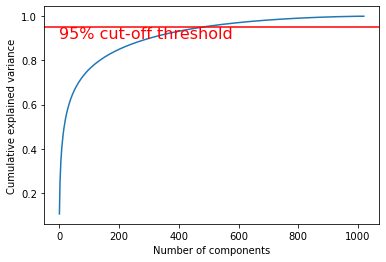

In [11]:
# Código não utilizado
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load data from the file, skipping the last column
all_features = np.loadtxt('all_features.txt', dtype=float, usecols=range(4096))

# Extract only the numerical part of the feature vectors
numerical_data = np.array([feature_array for feature_array in all_features])

# Apply PCA
pca = PCA()
pca.fit(numerical_data)

# Plot the cumulative explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumsum >= 0.95) + 1
pca_95 = PCA(n_components=num_components_95)
numerical_data_reduced = pca_95.fit_transform(numerical_data)

plt.plot(cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.25, 0.9, '95% cut-off threshold', color='red', fontsize=16)
plt.show()

In [5]:
len(pca_95.components_)

476

In [6]:
type(pca_95.components_)

numpy.ndarray

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming numerical_data_reduced is your reduced data
df_pca_components = pd.DataFrame(pca_95.components_.T, columns=[f'PC_{i+1}' for i in range(num_components_95)])

# Optionally, you can add a column with the original feature names
#original_feature_names = [f'Feature_{i+1}' for i in range(4096)]
#df_pca_components['Original_Feature'] = original_feature_names

# Save the DataFrame to a CSV file if needed
df_pca_components.to_csv('pca_components.csv', index=False)

# Display or use the DataFrame as needed
X_std = StandardScaler().fit_transform(df_pca_components)
print(df_pca_components)

          PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0     0.021521  0.022316 -0.003751  0.005907  0.005978 -0.017449  0.002958   
1    -0.005096 -0.013823  0.008418 -0.021163  0.028254  0.011941  0.014173   
2    -0.007426  0.002374  0.006314  0.001361 -0.007906 -0.004230 -0.009583   
3     0.000653  0.000082  0.000545  0.000880 -0.002687 -0.000162  0.000875   
4     0.010719 -0.005739 -0.001667 -0.008301 -0.004985 -0.008647 -0.015564   
...        ...       ...       ...       ...       ...       ...       ...   
4091 -0.003392  0.002530  0.000417 -0.002719 -0.003837 -0.002313 -0.003560   
4092  0.004022  0.025197 -0.011196  0.003090  0.031661 -0.011468  0.000177   
4093  0.003657 -0.041417  0.055640 -0.047996  0.076613 -0.042401  0.076742   
4094  0.005699 -0.000570 -0.000749  0.010193 -0.005688  0.000633  0.002262   
4095 -0.011858  0.019630  0.006875  0.028647  0.020693 -0.096347  0.003081   

          PC_8      PC_9     PC_10  ...    PC_467    PC_468    

C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

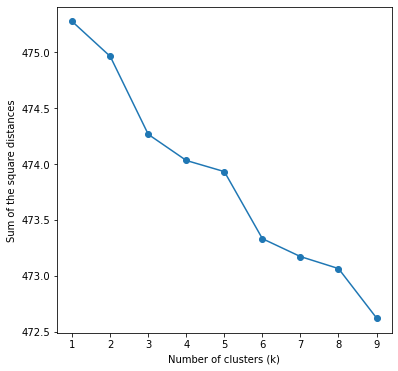

In [15]:
# Código não utilizado
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))
 
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_pca_components)
    sse.append(km.inertia_)
 
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters (k)')
plt.ylabel('Sum of the square distances')
plt.show()

C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

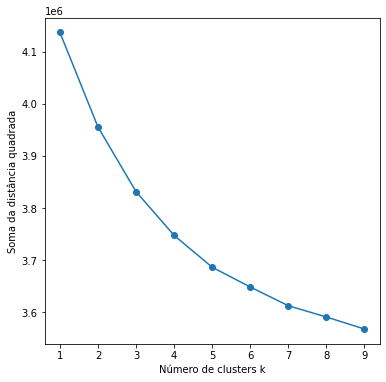

In [13]:
from sklearn.cluster import KMeans
import pandas as pd

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

df = pd.DataFrame(numerical_data)

X_std = StandardScaler().fit_transform(df)

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Número de clusters k')
plt.ylabel('Soma da distância quadrada');

In [15]:
import numpy as np
from numpy.linalg import norm

class Kmeans:
    #Kmeans algorithm

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [31]:
from sklearn.cluster import KMeans, SpectralClustering

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

print(centroids)

[[    0.40268    -0.16225    -0.19022 ...    -0.31672     0.26173    0.024986]
 [   -0.42044     0.16941     0.19861 ...     0.33068    -0.27327   -0.026088]]


In [17]:
print(km.labels)
print(len(km.labels))

[1 1 1 ... 1 1 1]
1020


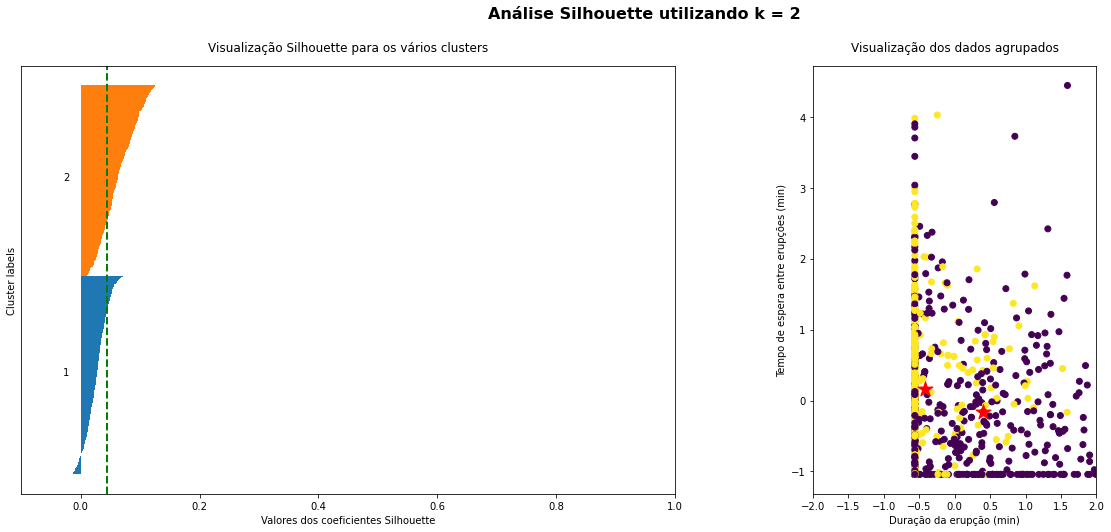

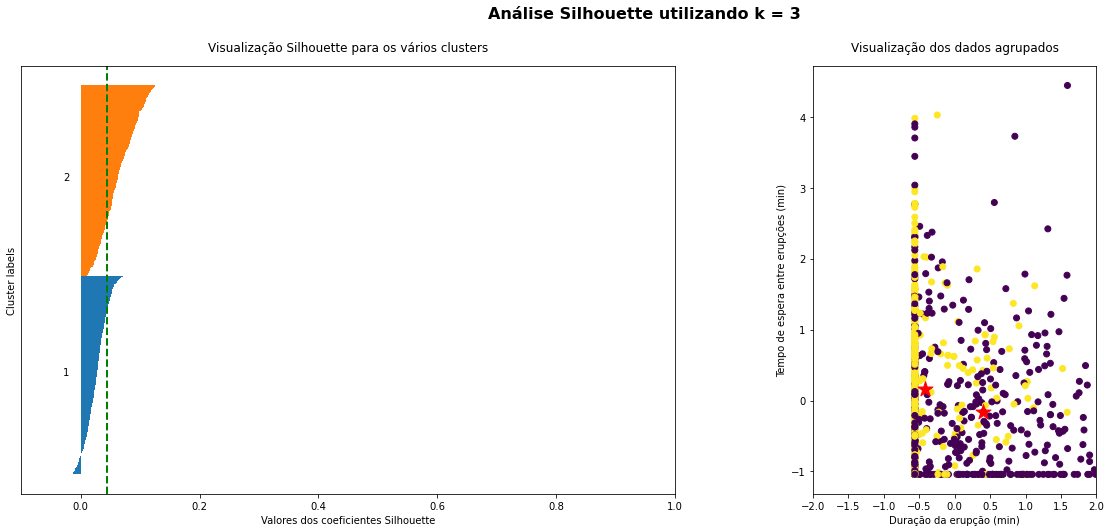

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([2, 3]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, km.labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(km.labels)):
        cluster_silhouette_vals = silhouette_vals[km.labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Valores dos coeficientes Silhouette')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Visualização Silhouette para os vários clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=km.labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Duração da erupção (min)')
    ax2.set_ylabel('Tempo de espera entre erupções (min)')
    ax2.set_title('Visualização dos dados agrupados', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Análise Silhouette utilizando k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [48]:
import os
import shutil 
import time

def save_image(image_path, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Construct the destination path
    destination_path = os.path.join(destination_folder, os.path.basename(image_path))
    
    # Copy the image to the destination folder
    shutil.copy(image_path, destination_path)
    
image_list = []
folder_path = "olhos_resize"

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load and preprocess an image
        image_path = os.path.join(folder_path, filename)
        image_list.append(image_path) 

for i, label in enumerate(km.labels):
    if label == 1:
        save_image(image_list[i], "clusters/2/1")
    if label == 0:
        save_image(image_list[i], "clusters/2/0")

In [34]:
from sklearn.cluster import KMeans, SpectralClustering

# Run local implementation of kmeans
km3 = Kmeans(n_clusters=3, max_iter=100)
km3.fit(X_std)
centroids = km3.centroids

print(centroids)

[[    0.58533    -0.22584    -0.14842 ...    -0.10312     0.23094   -0.059514]
 [   -0.23201     0.12653    -0.13924 ...     0.10828  -0.0031093     -0.1493]
 [   -0.41088    0.098852     0.42354 ...   -0.036292     -0.3047     0.32054]]


In [50]:
import os
import shutil 
import time

def save_image(image_path, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Construct the destination path
    destination_path = os.path.join(destination_folder, os.path.basename(image_path))
    
    # Copy the image to the destination folder
    shutil.copy(image_path, destination_path)
    
image_list = []
folder_path = "olhos_resize"

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load and preprocess an image
        image_path = os.path.join(folder_path, filename)
        image_list.append(image_path) 

for i, label in enumerate(km3.labels):
    if label == 2:
        save_image(image_list[i], "clusters/3/2")
    if label == 1:
        save_image(image_list[i], "clusters/3/1")
    if label == 0:
        save_image(image_list[i], "clusters/3/0")

In [36]:
from sklearn.cluster import KMeans, SpectralClustering

# Run local implementation of kmeans
km4 = Kmeans(n_clusters=4, max_iter=100)
km4.fit(X_std)
centroids = km4.centroids

print(centroids)

[[    0.64194    -0.33713   -0.075113 ...    -0.47613    0.056355     0.17274]
 [    -0.4968     0.26582     0.44082 ...     0.14991    -0.30294     0.26001]
 [  0.0072241     0.14884    -0.11072 ...     0.54084     0.23625    -0.19434]
 [   -0.17429   -0.038812    -0.21859 ...    -0.13368    0.013482    -0.22396]]


In [51]:
import os
import shutil 
import time

def save_image(image_path, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Construct the destination path
    destination_path = os.path.join(destination_folder, os.path.basename(image_path))
    
    # Copy the image to the destination folder
    shutil.copy(image_path, destination_path)
    
image_list = []
folder_path = "olhos_resize"

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load and preprocess an image
        image_path = os.path.join(folder_path, filename)
        image_list.append(image_path) 

for i, label in enumerate(km4.labels):
    if label == 3:
        save_image(image_list[i], "clusters/4/3")
    if label == 2:
        save_image(image_list[i], "clusters/4/2")
    if label == 1:
        save_image(image_list[i], "clusters/4/1")
    if label == 0:
        save_image(image_list[i], "clusters/4/0")

In [42]:
from sklearn.cluster import KMeans, SpectralClustering

# Run local implementation of kmeans
km5 = Kmeans(n_clusters=5, max_iter=100)
km5.fit(X_std)
centroids = km5.centroids

print(centroids)

[[    0.37136     -0.4225    0.038722 ...    -0.68366     0.10786     0.28911]
 [   -0.49371     0.27791     0.49725 ...    0.083769    -0.32163     0.32035]
 [     0.8028    -0.17829    -0.34426 ...   -0.081251     0.21224    -0.17848]
 [   -0.34125    0.041578     0.19524 ...     0.86397   -0.050043    -0.23891]
 [   -0.24089     0.17062    -0.23132 ...     0.06609    0.040343    -0.19031]]


In [52]:
import os
import shutil 
import time

def save_image(image_path, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Construct the destination path
    destination_path = os.path.join(destination_folder, os.path.basename(image_path))
    
    # Copy the image to the destination folder
    shutil.copy(image_path, destination_path)
    
image_list = []
folder_path = "olhos_resize"

for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Load and preprocess an image
        image_path = os.path.join(folder_path, filename)
        image_list.append(image_path) 

for i, label in enumerate(km5.labels):
    if label == 4:
        save_image(image_list[i], "clusters/5/4")
    if label == 3:
        save_image(image_list[i], "clusters/5/3")
    if label == 2:
        save_image(image_list[i], "clusters/5/2")
    if label == 1:
        save_image(image_list[i], "clusters/5/1")
    if label == 0:
        save_image(image_list[i], "clusters/5/0")